In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
users = pd.read_csv('/content/Salary_Data.csv')
jobs = pd.read_csv('/content/jobs.csv')

In [3]:
users['user_id'] = range(1, len(users) + 1)

In [4]:
users.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,user_id
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,2
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,3
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,4
4,52.0,Male,Master's,Director,20.0,200000.0,5


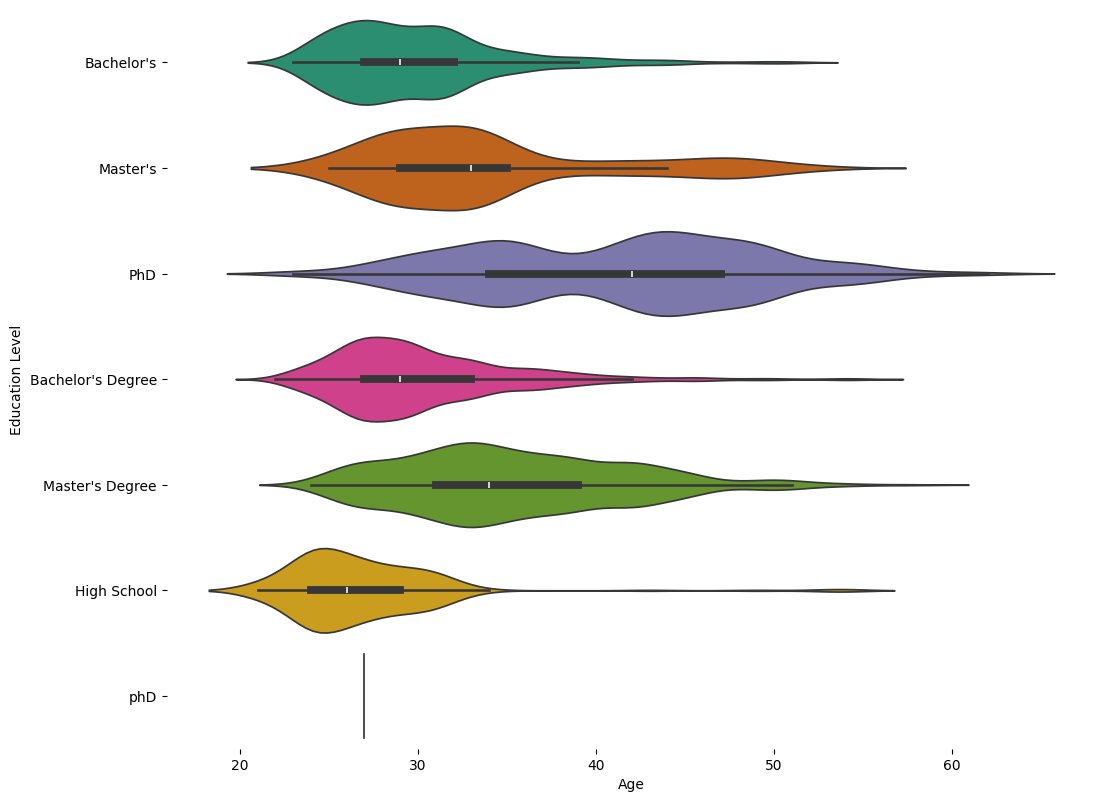

In [5]:
# @title Education Level vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(users['Education Level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(users, x='Age', y='Education Level', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

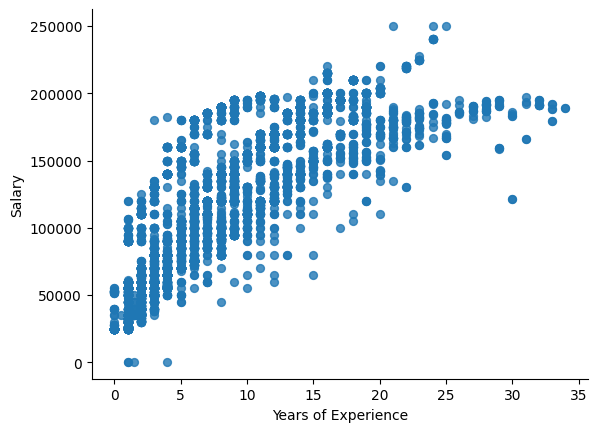

In [6]:
# @title Years of Experience vs Salary

from matplotlib import pyplot as plt
users.plot(kind='scatter', x='Years of Experience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

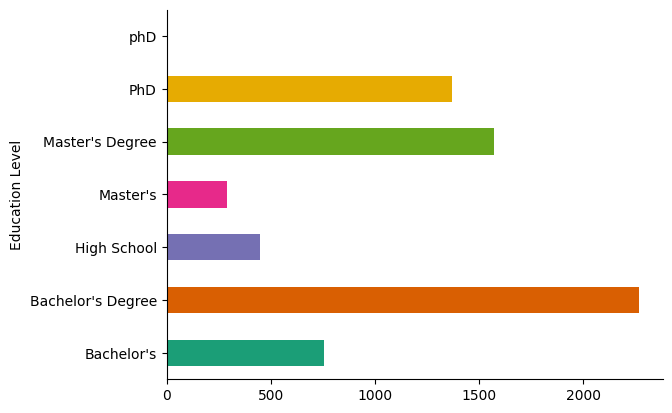

In [7]:
# @title Education Level

from matplotlib import pyplot as plt
import seaborn as sns
users.groupby('Education Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

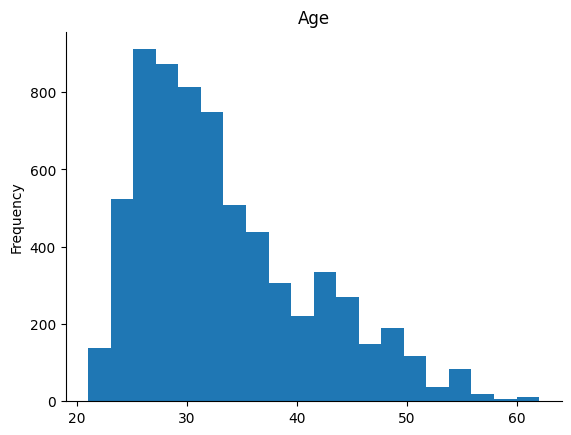

In [8]:

from matplotlib import pyplot as plt
users['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

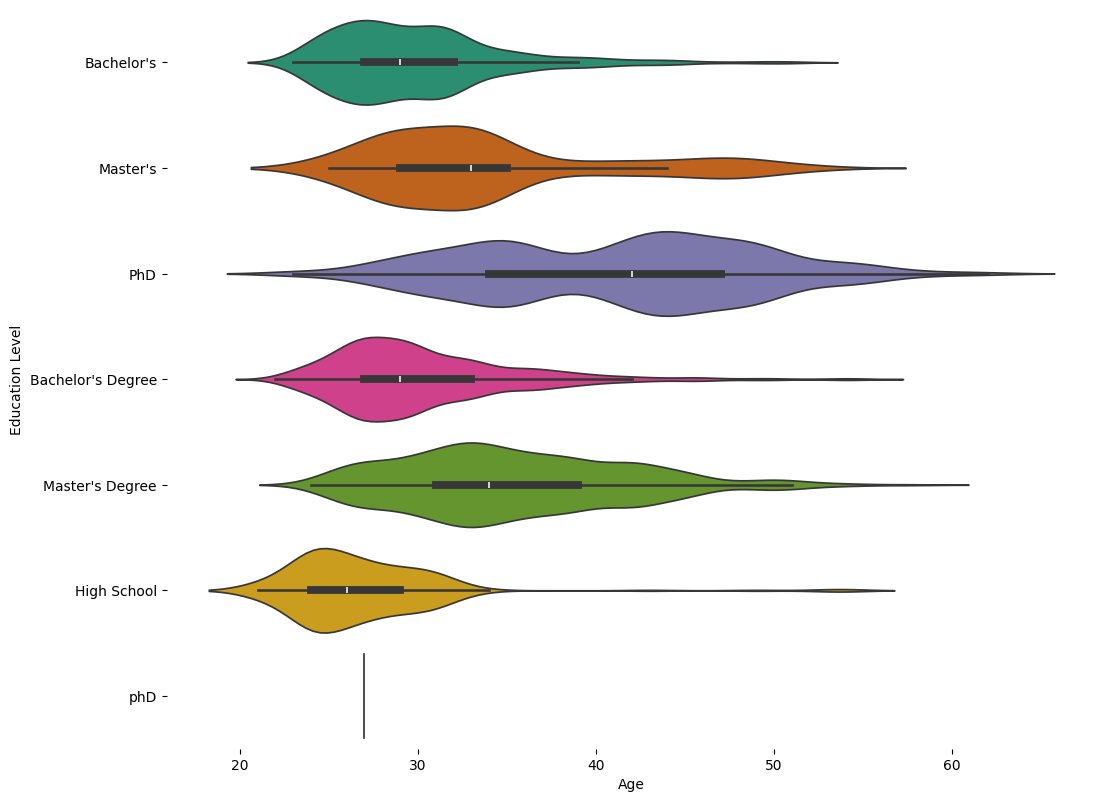

In [9]:
# @title Education Level vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(users['Education Level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(users, x='Age', y='Education Level', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [10]:
# Generate random user-job interactions
interactions = pd.DataFrame({
    'user_id': np.random.choice(users['user_id'], size = 5000),
    'job_id': np.random.choice(jobs['job_id'], size=5000),
    'interaction_score': np.random.randint(1, 5, size=5000) #interaction score e.g 1-5
})

In [11]:
interactions.head()

,user_id,job_id,interaction_score
0,1703,4640,1
1,2197,9051,1
2,6668,6164,2
3,2311,7042,2
4,1953,3874,4


In [12]:
users['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,2267
Master's Degree,1573
PhD,1368
Bachelor's,756
High School,448
Master's,288
phD,1


In [15]:
# I want to merge the Bachelor's degree with Bachelor's and phD with PhD and Master's Degree with Master's

users['Education Level'] = users['Education Level'].replace({
    'Bachelor\'s': 'Bachelor\'s Degree',
    'Master\'s Degree': 'Master\'s Degree',
    'PhD': 'phD'})

In [16]:
users['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,3023
Master's,1861
phD,1369
High School,448


In [17]:
jobs.head()

,job_id,job_title,required_experience,required_skills,location,applications,posted_date,application_deadline
0,1,Data Analyst,12,"Data Analysis, Python, R, SQL",Kisumu,20,8/6/2024,8/13/2024
1,2,Data Analyst,3,"R, Python, Data Analysis",Kisumu,423,8/3/2024,8/21/2024
2,3,Data Analyst,6,"Project Management, Python, Machine Learning",Mombasa,118,8/6/2024,8/17/2024
3,4,Data Analyst,9,"Python, R, SQL, Data Analysis",Nairobi,233,8/18/2024,9/3/2024
4,5,Data Scientist,9,"SQL, Machine Learning, Python, AI",Nairobi,421,8/14/2024,8/26/2024


In [18]:
users1= pd.read_csv('/content/users.csv')

In [20]:
users = pd.merge(users, users1, on='user_id', how='left')

In [21]:
users.shape

(6704, 19)

In [22]:
users.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,user_id,age,education_level,years_experience,skills,preferred_job,preferred_location,salary_expectation,search_keywords,search_frequency,last_search_time,past_jobs,tenure_years
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,1,31,PhD,7,"Machine Learning, SQL, R,Python",Machine Learning Engineer,Kisumu,86645,Machine Learning Jobs,9,10/20/2023,Data Scientist,6
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,2,37,PhD,8,"Project Management, Python, Data Analysis",Software Engineer,Nairobi,93895,Python jobs,8,11/2/2023,Data Scientist,2
2,45.0,Male,phD,Senior Manager,15.0,150000.0,3,37,PhD,18,"Data Analysis, Machine Learning",Data Analyst,Kisumu,88110,Machine Learning Jobs,7,2/27/2024,Machine Learning Engineer,2
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,4,45,PhD,12,Project Management,Data Analyst,Mombasa,138414,Data Science jobs,1,8/2/2024,Consultant,6
4,52.0,Male,Master's,Director,20.0,200000.0,5,52,PhD,19,Project Management,Data Scientist,Nairobi,179055,Data Science jobs,5,6/16/2024,Junior Data Analyst,8


In [23]:
# Generate random user-job interactions
interactions = pd.DataFrame({
    'user_id': np.random.choice(users['user_id'], size = 5000),
    'job_id': np.random.choice(jobs['job_id'], size=5000),
    'interaction_score': np.random.randint(1, 5, size=5000) #interaction score e.g 1-5
})

In [26]:
# Add job preferences to users
users['preferred_job'] = np.random.choice([
    'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Software Engineer'], size=6704)

users['preferred_location'] = np.random.choice([
    'Nairobi', 'Mombasa', 'Kisumu', 'Remote'], size=6704)

users['salary_expectation'] = np.random.randint(50000, 200000, size=6704)

users.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,user_id,age,education_level,years_experience,skills,preferred_job,preferred_location,salary_expectation,search_keywords,search_frequency,last_search_time,past_jobs,tenure_years
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,1,31,PhD,7,"Machine Learning, SQL, R,Python",Data Analyst,Mombasa,199415,Machine Learning Jobs,9,10/20/2023,Data Scientist,6
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,2,37,PhD,8,"Project Management, Python, Data Analysis",Data Analyst,Kisumu,88989,Python jobs,8,11/2/2023,Data Scientist,2
2,45.0,Male,phD,Senior Manager,15.0,150000.0,3,37,PhD,18,"Data Analysis, Machine Learning",Data Scientist,Nairobi,120051,Machine Learning Jobs,7,2/27/2024,Machine Learning Engineer,2
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,4,45,PhD,12,Project Management,Machine Learning Engineer,Remote,171192,Data Science jobs,1,8/2/2024,Consultant,6
4,52.0,Male,Master's,Director,20.0,200000.0,5,52,PhD,19,Project Management,Software Engineer,Kisumu,119916,Data Science jobs,5,6/16/2024,Junior Data Analyst,8


In [30]:
# Simulate Past Job Search Behaviours
users['search_keywords'] = np.random.choice([
    'Python jobs', 'Data Science jobs', 'Remote work', 'Machine Learning Jobs'],size = 6704)

users['search_frequency'] = np.random.randint(1, 10, size=6704) #number of searches per week
users['last_search_time'] = pd.to_datetime('2024-10-10') - pd.to_timedelta(np.random.randint(1, 365, size=6704), unit='d')


In [31]:
def calculate_skill_match(user_skills, job_skills):
    #Ensure they are strings
    if not isinstance(user_skills, str) or not isinstance(job_skills, str):
        return 0 #if skills data is invalid

    #convert the skills strings  to sets
    user_skills_set=set(user_skills.split(','))
    job_skills_set=set(job_skills.split(','))

    #if job requires no skills, return 0 match
    if len(job_skills_set) == 0:
        return 0

    # calculate the intersection and return match score
    return len(user_skills_set.intersection(job_skills_set)) / len(job_skills_set)

In [32]:
# Merge datasets
data = pd.merge(interactions, users, on='user_id')
df = pd.merge(data, jobs, on='job_id')

In [33]:
# Apply this logic to the interactions data
df['skills_match_score'] = df.apply(
    lambda row: calculate_skill_match(row['skills'], row['required_skills']), axis=1)

In [34]:
df.head()

,user_id,job_id,interaction_score,Age,Gender,Education Level,Job Title,Years of Experience,Salary,age,...,past_jobs,tenure_years,job_title,required_experience,required_skills,location,applications,posted_date,application_deadline,skills_match_score
0,5665,4660,3,29.0,Male,Bachelor's Degree,Marketing Analyst,4.0,70000.0,38,...,Research Assistant,9,Data Analyst,3,Data Analysis,Mombasa,366,8/7/2024,8/18/2024,0.0
1,5795,4222,3,26.0,Male,Bachelor's Degree,Product Designer,2.0,55000.0,52,...,Junior Data Engineer,2,Machine Learning Engineer,11,Python,Kisumu,162,8/29/2024,9/18/2024,0.0
2,2923,3831,2,52.0,Female,phD,Software Engineer Manager,29.0,194778.0,29,...,Junior Data Engineer,5,Data Scientist,11,SQL,Kisumu,157,8/15/2024,9/9/2024,0.0
3,649,4307,4,31.0,Male,Bachelor's Degree,Data Analyst,9.0,195000.0,53,...,Data Scientist,3,Data Analyst,4,Project Management,Mombasa,77,8/11/2024,8/18/2024,0.0
4,2507,8459,1,40.0,Female,Master's,Senior Software Engineer,16.0,138032.0,30,...,Research Assistant,7,Machine Learning Engineer,14,Data Analysis,Mombasa,287,8/25/2024,9/15/2024,0.0


In [35]:
df.shape

(5000, 29)

In [36]:
df['applied'] = np.random.choice([0, 1], size=len(df)) # if user applied 1 and 0 otherwise

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
# Feature Engineering: Example of extracting key features
df['skills_count'] = df['skills'].apply(lambda x: len(x.split(',')))

In [46]:
# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=['number']).columns

In [43]:
df = pd.get_dummies(df, columns=['Education Level', 'preferred_job', 'preferred_location', 'Gender'])

In [47]:
#Train-test split using only numerical features
train, test = train_test_split(df[numerical_features], test_size=0.2, random_state=42)

In [48]:
# Scale features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [49]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten, Dense
from tensorflow.keras.models import Model

In [66]:
# Add a Dense layer with a single output unit to match the target shape
from tensorflow import keras
output = keras.layers.Dense(1)(output)

In [61]:
n_users = len(data['user_id'].unique())
n_jobs = len(data['job_id'].unique())

In [62]:
# Input layers
user_input = Input(shape=(1,))
job_input = Input(shape=(1,))

In [63]:
# Embedding layers
user_embedding = Embedding(input_dim=n_users, output_dim=50)(user_input)
job_embedding = Embedding(input_dim=n_jobs, output_dim=50)(job_input)

In [64]:
# Dot product of embeddings to predict interaction score
dot_product = Dot(axes=1)([user_embedding, job_embedding])

In [65]:
# Flatten the output
output = Flatten()(dot_product)

In [67]:
# Build the model
model = Model(inputs=[user_input, job_input], outputs=output)

In [68]:
# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [69]:
train.head()

,user_id,job_id,interaction_score,Age,Years of Experience,Salary,age,years_experience,salary_expectation,search_frequency,tenure_years,required_experience,applications,skills_match_score,applied,skills_count
4227,348,4645,3,45.0,19.0,180000.0,46,6,145394,7,9,6,164,0.0,0,1
4676,6036,2835,3,27.0,2.0,55000.0,33,14,112408,4,5,3,167,0.0,1,1
800,4861,7845,4,26.0,2.0,31000.0,55,2,174675,7,8,9,74,0.0,0,1
3671,1111,8515,4,34.0,12.0,195000.0,51,1,196325,6,9,11,68,0.0,1,1
4193,2771,8408,2,24.0,2.0,55000.0,32,14,56256,3,8,8,479,0.0,1,1


In [70]:
# Assuming 'user_id' is the first column and 'job_id' is the second
# and 'interaction_score' is in another column (e.g., the third column)
user_id_column_index = 0  # Replace with the actual column index of 'user_id'
job_id_column_index = 1  # Replace with the actual column index of 'job_id'
interaction_score_column_index = 2  # Replace with the actual column index of 'interaction_score'

model.fit(
    [train_scaled[:, user_id_column_index], train_scaled[:, job_id_column_index]],
    train_scaled[:, interaction_score_column_index],
    epochs=10
)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9910
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9918
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9986
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0008
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9926
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0084
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0096
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9950
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9961
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0030


In [75]:
# Concatenate embeddings with content-based features (e.g., job description, user profile data)
n_features = 10
content_input = Input(shape=(n_features,))
from tensorflow.keras.layers import concatenate
concatenated = concatenate([user_embedding, job_embedding, content_input], axis=-1)

In [76]:
# Add more dense layers for deeper feature learning
x = Dense(128, activation='relu')(concatenated)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

In [78]:
 # 'user_id' is the first column, 'job_id' is the second,
# 'content_features' starts from the third column, and
# 'interaction_score' is in another column (adjust indices accordingly)
user_id_column_index = 0
job_id_column_index = 1
content_features_start_index = 3 # Adjust if content features span multiple columns
interaction_score_column_index = train_scaled.shape[2]  # Assuming it's the last column


# Assuming content features span n_features columns
content_features_end_index = content_features_start_index + n_features

model.fit(
    [
        train_scaled[:, user_id_column_index],
        train_scaled[:, job_id_column_index],
        train_scaled[:, content_features_start_index:content_features_end_index]  # Select content feature columns
    ],
    train_scaled[:, interaction_score_column_index],
    epochs=10
)

IndexError: tuple index out of range